 # 1. Preprocessing of Data Set

In [3]:
pip install pandas


     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     --------------------------------------- 0.1/11.6 MB 525.1 kB/s eta 0:00:22
     --------------------------------------- 0.1/11.6 MB 525.1 kB/s eta 0:00:22
     --------------------------------------- 0.1/11.6 MB 365.7 kB/s eta 0:00:32
     --------------------------------------- 0.1/11.6 MB 374.1 kB/s eta 0:00:31
     --------------------------------------- 0.1/11.6 MB 481.4 kB/s eta 0:00:24
     --------------------------------------- 0.1/11.6 MB 448.2 kB/s eta 0:00:26
      -------------------------------------- 0.2/11.6 MB 437.1 kB/s eta 0:00:27
      -------------------------------------- 0.2/11.6 MB 446.4 kB/s eta 0:00:26
      -------------------------------------- 0.2/11.6 MB 444.3 kB/s eta 0:00:26
      -------------------------------------- 0.2/11.6 MB 437.4 kB/s eta 0:00:26
      -------------------------------------- 0.3/11.6 MB


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\Shahz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install python-docx



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/244.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/244.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/244.3 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/244.3 kB 469.7 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/244.3 kB 469.7 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/244.3 kB 403.5 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/244.3 kB 409.6 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/244.3 kB 400.9 kB/s eta 0:00:01
   ---------------------- --------------- 143.4/244.3 kB 405.9 kB/s eta 0:00:01
   ---------------------- --------------- 143.4/244.3 kB 405.9 kB/s eta 0:00:01
   ----------------------- -------------- 153.6/244.3 kB 367.6 kB/s eta 0:00:01
   ----------------------- -------------- 153.6/244.3 kB 367.6 kB/s eta 0:00:01
   ----------------------- -------------- 153.6/244.3 kB

In [ ]:
import pandas as pd
import os
from datetime import datetime
from docx import Document

train_dir = './Train'
weather_dir = './Weather'

#function to read all train .docx files and compile into a single DataFrame

def compile_train_data(train_dir):
    from docx import Document
    import json
    
    train_data = []
    
    for filename in os.listdir(train_dir):
        if filename.endswith('.docx'):
            file_path = os.path.join(train_dir, filename)
            doc = Document(file_path)
            for paragraph in doc.paragraphs:
                try:

                    data = json.loads(paragraph.text)
                    
                    #check if data is a list and extend the train_data
                    if isinstance(data, list):
                        train_data.extend(data)
                    else:
                        train_data.append(data)
                except json.JSONDecodeError:
                    continue
    
    #convert the train data to a structured format
    processed_data = []
    counter = 0
    for record in train_data:
        try:
            processed_data.append({
                "Flight Number": record["flight"]["number"],
                "Departure Airport": record["departure"]["iataCode"],
                "Scheduled Time": record["departure"]["scheduledTime"],
                "Actual Time": record["departure"].get("actualTime", None),
                "Arrival Airport": record["arrival"]["iataCode"]
            })

        except KeyError:
            counter+=1
            continue
    print(f"{counter} records skipped")
    return pd.DataFrame(processed_data)


train_data = compile_train_data(train_dir)



In [1]:
##compilation of test data
def compile_test_data(test_dir):
    from docx import Document
    import json
    import pandas as pd
    import os

    test_data = []

    for filename in os.listdir(test_dir):
        if filename.endswith('.docx'):
            file_path = os.path.join(test_dir, filename)
            doc = Document(file_path)
            for paragraph in doc.paragraphs:
                try:
                    #load JSON data from the paragraph
                    data = json.loads(paragraph.text)

                    #check if data is a list and extend the test_data
                    if isinstance(data, list):
                        test_data.extend(data)
                    else:
                        test_data.append(data)
                except json.JSONDecodeError:
                    continue

    #process the test data and infer missing actual times
    processed_data = []
    counter = 0
    for record in test_data:
        try:
            #infer actual time using estimated or scheduled times
            actual_time = record["departure"].get("actualRunway") or \
                          record["departure"].get("estimatedRunway") or \
                          record["departure"].get("scheduledTime")

            processed_data.append({
                "Flight Number": record["flight"]["number"],
                "Departure Airport": record["departure"]["iataCode"],
                "Scheduled Time": record["departure"]["scheduledTime"],
                "Actual Time": actual_time,
                "Arrival Airport": record["arrival"]["iataCode"]
            })
        except KeyError:
            counter += 1
            continue

    print(f"{counter} records skipped")
    return pd.DataFrame(processed_data)


In [2]:
test_dir = "./Test"

test_data = compile_test_data(test_dir)

0 records skipped


In [3]:
test_data

,Flight Number,Departure Airport,Scheduled Time,Actual Time,Arrival Airport
0,847,lhe,2023-07-17t20:35:00.000,2023-07-17t20:46:00.000,khi
1,725,lhe,2023-07-27t08:00:00.000,2023-07-27t08:00:00.000,ruh
2,4359,lhe,2023-07-27t08:00:00.000,2023-07-27t08:00:00.000,dxb
3,470,lhe,2023-07-28t16:45:00.000,2023-07-28t16:45:00.000,jed
4,3932,lhe,2023-07-19t04:15:00.000,2023-07-19t04:18:00.000,auh
...,...,...,...,...,...
14905,412,lhe,2023-11-23t23:15:00.000,2023-11-23t23:27:00.000,shj
14906,859,lhe,2023-11-25t18:45:00.000,2023-11-25t19:05:00.000,jed
14907,6187,lhe,2023-11-25t02:55:00.000,2023-11-25t03:07:00.000,doh
14908,6032,lhe,2023-11-27t08:35:00.000,2023-11-27t08:35:00.000,doh


In [ ]:
train_data

hello


## Preprocessing of Weather data set on a single file

In [ ]:
import pandas as pd

#processing_1 file to check out results
file_path = "2.xlsx"
df = pd.read_excel(file_path)

#helper function to reshape data into groups of Max, Avg, Min
def reshape_data_to_max_avg_min(values):
    """Reshape list into tuples of (Max, Avg, Min)."""
    return [(float(values[i]), float(values[i+1]), float(values[i+2])) for i in range(0, len(values), 3)]

#process the Time column to extract dates without the year

base_time = pd.to_datetime("2023-08-01")  #starting date
time_dates = [(base_time + pd.Timedelta(days=i)).strftime('%m-%d') for i in range(31)]

#process each relevant column (excluding the 'Time' column) to reshape Max, Avg, Min
columns_to_process = [
    "Temperature (°F)",
    "Dew Point (°F)",
    "Humidity (%)",
    "Wind Speed (mph)",
    "Pressure (in)"
]

processed_dfs = {}

for column in columns_to_process:
    #splitting
    raw_values = df[column].iloc[0].split()[3:]  # Exclude "Max Avg Min" markers
    reshaped = reshape_data_to_max_avg_min(raw_values)

    #reshaping it
    temp_df = pd.DataFrame(reshaped, columns=["Max", "Avg", "Min"])
    
    #assigning coresponding dates
    temp_df["Date"] = time_dates[:len(reshaped)]

    
    processed_dfs[column] = temp_df

#combining all preprocess data
final_combined_df = pd.concat(processed_dfs, axis=1)

final_combined_df

Temperature (°F)                    Dew Point (°F)                     \
                Max   Avg   Min   Date            Max   Avg   Min   Date   
0              95.0  86.7  77.0  08-01           84.0  78.7  75.0  08-01   
1              99.0  88.8  82.0  08-02           81.0  78.2  73.0  08-02   
2              97.0  88.2  79.0  08-03           79.0  76.9  73.0  08-03   
3             100.0  91.7  84.0  08-04           79.0  78.4  75.0  08-04   
4              95.0  86.9  77.0  08-05           81.0  77.5  73.0  08-05   
5              99.0  90.5  84.0  08-06           81.0  77.8  75.0  08-06   
6              95.0  88.7  84.0  08-07           81.0  77.6  75.0  08-07   
7              99.0  91.0  82.0  08-08           79.0  77.1  75.0  08-08   
8              95.0  89.7  82.0  08-09           81.0  78.3  75.0  08-09   
9              95.0  88.8  84.0  08-10           81.0  78.7  75.0  08-10   
10             99.0  87.7  82.0  08-11           79.0  77.2  75.0  08-11   
11             99.0  90.2  84.0  08-12           79.0  76.7  73.0  08-12   
12             99.0  91.6  84.0  08-13           77.0  76.3  75.0  08-13   
13             93.0  88.1  82.0  08-14           81.0  78.3  75.0  08-14   
14             95.0  87.0  79.0  08-15           79.0  76.2  73.0  08-15   
15             97.0  89.7  82.0  08-16           79.0  77.4  75.0  08-16   
16             99.0  91.0  84.0  08-17           79.0  76.8  75.0  08-17   
17             99.0  91.8  84.0  08-18           81.0  78.3  77.0  08-18   
18             99.0  89.6  84.0  08-19           81.0  77.4  75.0  08-19   
19             99.0  89.4  81.0  08-20           81.0  78.3  75.0  08-20   
20             97.0  90.4  82.0  08-21           81.0  78.5  75.0  08-21   
21            100.0  93.2  86.0  08-22           81.0  79.6  77.0  08-22   
22             99.0  91.6  86.0  08-23           79.0  78.0  75.0  08-23   
23             97.0  88.2  82.0  08-24           79.0  77.3  75.0  08-24   
24             93.0  86.2  77.0  08-25           79.0  75.8  72.0  08-25   
25             93.0  84.0  77.0  08-26           79.0  75.1  72.0  08-26   
26             95.0  87.1  79.0  08-27           75.0  73.2  72.0  08-27   
27             93.0  83.8  73.0  08-28           75.0  72.4  68.0  08-28   
28             95.0  85.8  79.0  08-29           75.0  71.1  68.0  08-29   
29             99.0  88.8  77.0  08-30           75.0  71.2  68.0  08-30   
30             99.0  90.3  82.0  08-31           75.0  73.2  72.0  08-31   

   Humidity (%)                    Wind Speed (mph)                    \
            Max   Avg   Min   Date              Max   Avg  Min   Date   
0          94.0  77.2  59.0  08-01             29.0   6.3  0.0  08-01   
1          84.0  71.5  53.0  08-02             29.0   6.7  0.0  08-02   
2          89.0  69.9  56.0  08-03             20.0   5.2  0.0  08-03   
3          79.0  65.5  50.0  08-04             21.0   8.3  0.0  08-04   
4          89.0  73.6  59.0  08-05             21.0   7.6  0.0  08-05   
5          79.0  66.7  53.0  08-06             15.0   7.5  0.0  08-06   
6          89.0  70.3  56.0  08-07             16.0   7.0  0.0  08-07   
7          79.0  64.6  50.0  08-08             15.0   8.3  0.0  08-08   
8          79.0  69.0  56.0  08-09             17.0   6.7  0.0  08-09   
9          84.0  71.9  59.0  08-10             21.0   8.3  0.0  08-10   
10         89.0  71.8  53.0  08-11             29.0   7.3  0.0  08-11   
11         84.0  65.7  49.0  08-12            128.0  12.1  5.0  08-12   
12         79.0  61.8  50.0  08-13             20.0  10.6  1.0  08-13   
13         84.0  72.6  66.0  08-14             25.0  12.2  5.0  08-14   
14         89.0  71.3  56.0  08-15             15.0   6.7  0.0  08-15   
15         84.0  67.5  53.0  08-16             12.0   4.5  0.0  08-16   
16         79.0  63.6  50.0  08-17             12.0   6.0  0.0  08-17   
17         79.0  64.9  50.0  08-18             14.0   5.2  0.0  08-18   
18         84.0  67.9  53.0  08-19

## Preprocessing on all Weather files and storing them

In [ ]:
import os
import pandas as pd


#helper function to reshape data into groups of Max, Avg, Min
def reshape_data_to_max_avg_min(values):
    """Reshape list into tuples of (Max, Avg, Min)."""
    return [(float(values[i]), float(values[i+1]), float(values[i+2])) for i in range(0, len(values), 3)]


#process the Time column to extract dates dynamically
def get_dates_for_month(year, month):
    """Generate sequential dates for a given month."""

    num_days = pd.Period(f"{year}-{month:02d}").days_in_month
    time_dates = [f"{year}-{month:02d}-{day:02d}" for day in range(1, num_days + 1)]
    return time_dates


#process a single file to extract and reshape data
def process_file(file_path, year, month):
    """Process a single Excel file."""
    df = pd.read_excel(file_path)

    #dictionary to store processed data for each column
    processed_dfs = {}
    columns_to_process = [
        "Temperature (°F)",
        "Dew Point (°F)",
        "Humidity (%)",
        "Wind Speed (mph)",
        "Pressure (in)"
    ]

    #dynamically get dates for months
    dates = get_dates_for_month(year, month)

    for column in columns_to_process:

        #split the raw string data for the current column, ignoring initial headers
        raw_values = df[column].iloc[0].split()[3:]  
        reshaped = reshape_data_to_max_avg_min(raw_values)

        #only process valid entries up to the number of days in the month
        valid_days = min(len(reshaped), len(dates))
        temp_df = pd.DataFrame(reshaped[:valid_days], columns=["Max", "Avg", "Min"])

        #assigning coressponding dates 
        temp_df["Date"] = dates[:valid_days]

        #store it in a dictionary for further analysis
        processed_dfs[column] = temp_df

    return processed_dfs


#combine all DataFrames from multiple files
def process_multiple_files(path_to_files):
    """Read and process the first 12 files from a directory."""
    all_data = {}
    file_paths = [os.path.join(path_to_files, file) for file in os.listdir(path_to_files) if file.endswith(".xlsx")]

    #months for mapping
    months = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]  

    #process the first 12 files, assigning each one to a specific month
    for i, file_path in enumerate(file_paths[:12]):
        if i >= len(months):  
            break
        month = months[i]  
        year = 2023 if month >= 7 else 2024  #handle year rollover logic

        processed_data = process_file(file_path, year, month)

        #merge the extracted data into the all_data dictionary
        for column, df in processed_data.items():
            if column in all_data:
                all_data[column] = pd.concat([all_data[column], df], axis=0)
            else:
                all_data[column] = df

    #return the merged data as DataFrames
    return all_data


# weather directory folder
weather_directory = './Weather/'

#process multiple files and merge the data
weather_data = process_multiple_files(weather_directory)
weather_data

{'Temperature (°F)':       Max   Avg   Min        Date
 0    97.0  88.8  81.0  2023-07-01
 1    99.0  91.5  82.0  2023-07-02
 2   102.0  91.7  77.0  2023-07-03
 3    97.0  88.5  81.0  2023-07-04
 4    86.0  76.0  68.0  2023-07-05
 ..    ...   ...   ...         ...
 25   93.0  84.0  77.0  2024-06-26
 26   95.0  87.1  79.0  2024-06-27
 27   93.0  83.8  73.0  2024-06-28
 28   95.0  85.8  79.0  2024-06-29
 29   99.0  88.8  77.0  2024-06-30
 
 [348 rows x 4 columns],
 'Dew Point (°F)':      Max   Avg   Min        Date
 0   77.0  74.5  72.0  2023-07-01
 1   79.0  75.8  75.0  2023-07-02
 2   81.0  77.0  73.0  2023-07-03
 3   77.0  74.3  73.0  2023-07-04
 4   79.0  72.9  68.0  2023-07-05
 ..   ...   ...   ...         ...
 25  79.0  75.1  72.0  2024-06-26
 26  75.0  73.2  72.0  2024-06-27
 27  75.0  72.4  68.0  2024-06-28
 28  75.0  71.1  68.0  2024-06-29
 29  75.0  71.2  68.0  2024-06-30
 
 [348 rows x 4 columns],
 'Humidity (%)':       Max   Avg   Min        Date
 0    74.0  63.4  47.0  2023-

In [ ]:
# adding 13th file in it
def process_multiple_files(path_to_files):
    """Read and process the first 12 files from a directory."""
    all_data = {}
    file_paths = [os.path.join(path_to_files, file) for file in os.listdir(path_to_files) if file.endswith(".xlsx")]


    months = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]  


    for i, file_path in enumerate(file_paths[:13]):
        if i >= len(months):  
            break
        month = months[i]  
        year = 2023 if month >= 7 else 2024  

        processed_data = process_file(file_path, year, month)


        for column, df in processed_data.items():
            if column in all_data:
                all_data[column] = pd.concat([all_data[column], df], axis=0)
            else:
                all_data[column] = df

    if len(file_paths) > 12:
        file_path = file_paths[12]  
        additional_month = 6  
        additional_year = 2024  

        processed_data = process_file(file_path, additional_year, additional_month)


        for column, df in processed_data.items():
            if column in all_data:
                all_data[column] = pd.concat([all_data[column], df], axis=0)
            else:
                all_data[column] = df


    return all_data



weather_directory = './Weather/'


weather_data = process_multiple_files(weather_directory)



In [7]:
weather_data

{'Temperature (°F)':       Max   Avg   Min        Date
 0    97.0  88.8  81.0  2023-07-01
 1    99.0  91.5  82.0  2023-07-02
 2   102.0  91.7  77.0  2023-07-03
 3    97.0  88.5  81.0  2023-07-04
 4    86.0  76.0  68.0  2023-07-05
 ..    ...   ...   ...         ...
 25   93.0  84.0  77.0  2024-06-26
 26   95.0  87.1  79.0  2024-06-27
 27   93.0  83.8  73.0  2024-06-28
 28   95.0  85.8  79.0  2024-06-29
 29   99.0  88.8  77.0  2024-06-30
 
 [348 rows x 4 columns],
 'Dew Point (°F)':      Max   Avg   Min        Date
 0   77.0  74.5  72.0  2023-07-01
 1   79.0  75.8  75.0  2023-07-02
 2   81.0  77.0  73.0  2023-07-03
 3   77.0  74.3  73.0  2023-07-04
 4   79.0  72.9  68.0  2023-07-05
 ..   ...   ...   ...         ...
 25  79.0  75.1  72.0  2024-06-26
 26  75.0  73.2  72.0  2024-06-27
 27  75.0  72.4  68.0  2024-06-28
 28  75.0  71.1  68.0  2024-06-29
 29  75.0  71.2  68.0  2024-06-30
 
 [348 rows x 4 columns],
 'Humidity (%)':       Max   Avg   Min        Date
 0    74.0  63.4  47.0  2023-

In [ ]:
consolidated_weather_data = pd.DataFrame()
# converting dictionary to data frame


#iterate through the dictionary to merge weather data on the Date
for column, df in weather_data.items():

    df = df.rename(columns={"Max": f"{column} Max", "Avg": f"{column} Avg", "Min": f"{column} Min"})
    
    #merge into the consolidated DataFrame
    if consolidated_weather_data.empty:
        consolidated_weather_data = df  
    else:
        consolidated_weather_data = pd.merge(consolidated_weather_data, df, on="Date", how="outer")

consolidated_weather_data

,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,Date,Dew Point (°F) Max,Dew Point (°F) Avg,Dew Point (°F) Min,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min
0,97.0,88.8,81.0,2023-07-01,77.0,74.5,72.0,74.0,63.4,47.0,14.0,8.9,5.0,28.8,28.8,28.7
1,99.0,91.5,82.0,2023-07-02,79.0,75.8,75.0,79.0,61.3,47.0,12.0,6.7,0.0,28.8,28.8,28.7
2,102.0,91.7,77.0,2023-07-03,81.0,77.0,73.0,100.0,63.7,45.0,35.0,11.0,0.0,28.8,28.8,28.7
3,97.0,88.5,81.0,2023-07-04,77.0,74.3,73.0,79.0,64.0,47.0,32.0,13.0,0.0,28.8,28.7,28.6
4,86.0,76.0,68.0,2023-07-05,79.0,72.9,68.0,100.0,90.2,70.0,40.0,15.0,5.0,28.8,28.8,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,93.0,84.0,77.0,2024-06-26,79.0,75.1,72.0,94.0,75.3,63.0,16.0,6.2,0.0,28.9,28.8,28.8
344,95.0,87.1,79.0,2024-06-27,75.0,73.2,72.0,79.0,64.7,49.0,14.0,6.8,0.0,28.8,28.8,28.8
345,93.0,83.8,73.0,2024-06-28,75.0,72.4,68.0,94.0,69.5,52.0,35.0,9.3,0.0,28.9,28.8,28.8
346,95.0,85.8,79.0,2024-06-29,75.0,71.1,68.0,89.0,64.0,41.0,25.0,7.9,0.0,28.9,28.9,28.8


In [ ]:
import pandas as pd
import os
from datetime import datetime
from docx import Document


#directories
train_dir = './Train'
weather_dir = './Weather'


#function to read all train .docx files and compile into a single DataFrame
def compile_train_data(train_dir):
    from docx import Document
    import json
    
    train_data = []
    
    for filename in os.listdir(train_dir):
        if filename.endswith('.docx'):
            file_path = os.path.join(train_dir, filename)
            doc = Document(file_path)
            for paragraph in doc.paragraphs:
                try:
                    #load JSON, assuming the paragraph contains a list of flight data
                    data = json.loads(paragraph.text)
                    
                    #check if data is a list and extend the train_data
                    if isinstance(data, list):
                        train_data.extend(data)
                    else:
                        train_data.append(data)
                except json.JSONDecodeError:
                    continue
    
    #convert the train data to a structured format
    processed_data = []
    counter = 0
    for record in train_data:
        try:
            processed_data.append({
                "Flight Number": record["flight"]["number"],
                "Departure Airport": record["departure"]["iataCode"],
                "Scheduled Time": record["departure"]["scheduledTime"],
                "Actual Time": record["departure"].get("actualTime", None),
                "Arrival Airport": record["arrival"]["iataCode"]
            })
        except KeyError:
            counter += 1
            continue
    print(f"{counter} records skipped")
    return pd.DataFrame(processed_data)


#load the train data set
train_data = compile_train_data(train_dir)


#function to read weather data and reshape for merging
def read_weather_data(weather_dir):
    """
    Reads and combines weather data from multiple weather files.
    Processes and adds a normalized 'Date' column (MM-DD) to allow merging.
    """
    all_weather_data = []
    
    for file_name in os.listdir(weather_dir):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(weather_dir, file_name)
            df = pd.read_excel(file_path)
            

            df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m-%d')  
            all_weather_data.append(df)

    #combine all weather data into a single DataFrame
    combined_weather_data = pd.concat(all_weather_data, ignore_index=True)
    return combined_weather_data


#process weather data
weather_data = read_weather_data(weather_dir)


#process the train data's Scheduled Time to normalize into MM-DD
train_data['Scheduled Date'] = pd.to_datetime(train_data['Scheduled Time']).dt.strftime('%m-%d')


#merge train data with weather data on the normalized date (MM-DD)
merged_data = pd.merge(train_data, consolidated_weather_data, left_on='Scheduled Date', right_on='Date', how='left')


#drop redundant date columns if necessary
merged_data.drop(columns=['Date'], inplace=True)

print(merged_data.head())


In [ ]:
#initialize an empty DataFrame with Date as the primary column
weather_data = pd.DataFrame()


for column, df in weather_data.items():
    #rename the columns to include the weather attribute for clarity
    df = df.rename(columns={"Max": f"{column} Max", "Avg": f"{column} Avg", "Min": f"{column} Min"})
    
    #merge into the consolidated DataFrame
    if consolidated_weather_data.empty:
        consolidated_weather_data = df  
    else:
        consolidated_weather_data = pd.merge(consolidated_weather_data, df, on="Date", how="outer")


print(consolidated_weather_data.head())


consolidated_weather_data.reset_index(drop=True, inplace=True)


   Temperature (°F) Max  Temperature (°F) Avg  Temperature (°F) Min  \
0                  97.0                  88.8                  81.0   
1                  99.0                  91.5                  82.0   
2                 102.0                  91.7                  77.0   
3                  97.0                  88.5                  81.0   
4                  86.0                  76.0                  68.0   

         Date  Dew Point (°F) Max  Dew Point (°F) Avg  Dew Point (°F) Min  \
0  2023-07-01                77.0                74.5                72.0   
1  2023-07-02                79.0                75.8                75.0   
2  2023-07-03                81.0                77.0                73.0   
3  2023-07-04                77.0                74.3                73.0   
4  2023-07-05                79.0                72.9                68.0   

   Humidity (%) Max  Humidity (%) Avg  Humidity (%) Min  Wind Speed (mph) Max  \
0              74.0          

## Combining both Data set

In [126]:
weather_data

""


In [113]:
consolidated_weather_data

,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,Date,Dew Point (°F) Max,Dew Point (°F) Avg,Dew Point (°F) Min,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min
0,97.0,88.8,81.0,2023-07-01,77.0,74.5,72.0,74.0,63.4,47.0,14.0,8.9,5.0,28.8,28.8,28.7
1,99.0,91.5,82.0,2023-07-02,79.0,75.8,75.0,79.0,61.3,47.0,12.0,6.7,0.0,28.8,28.8,28.7
2,102.0,91.7,77.0,2023-07-03,81.0,77.0,73.0,100.0,63.7,45.0,35.0,11.0,0.0,28.8,28.8,28.7
3,97.0,88.5,81.0,2023-07-04,77.0,74.3,73.0,79.0,64.0,47.0,32.0,13.0,0.0,28.8,28.7,28.6
4,86.0,76.0,68.0,2023-07-05,79.0,72.9,68.0,100.0,90.2,70.0,40.0,15.0,5.0,28.8,28.8,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,93.0,84.0,77.0,2024-06-26,79.0,75.1,72.0,94.0,75.3,63.0,16.0,6.2,0.0,28.9,28.8,28.8
344,95.0,87.1,79.0,2024-06-27,75.0,73.2,72.0,79.0,64.7,49.0,14.0,6.8,0.0,28.8,28.8,28.8
345,93.0,83.8,73.0,2024-06-28,75.0,72.4,68.0,94.0,69.5,52.0,35.0,9.3,0.0,28.9,28.8,28.8
346,95.0,85.8,79.0,2024-06-29,75.0,71.1,68.0,89.0,64.0,41.0,25.0,7.9,0.0,28.9,28.9,28.8


In [131]:
train_data

,Flight Number,Departure Airport,Scheduled Time,Actual Time,Arrival Airport,Scheduled Date
0,737,lhe,2023-07-20t20:50:00.000,2023-07-20t20:15:00.000,ruh,07-20
1,843,lhe,2023-07-18t15:05:00.000,None,khi,07-18
2,841,lhe,2023-07-23t09:50:00.000,None,khi,07-23
3,205,lhe,2023-07-26t23:30:00.000,2023-07-26t23:51:00.000,kwi,07-26
4,723,lhe,2023-07-20t11:35:00.000,None,dxb,07-20
...,...,...,...,...,...,...
51567,841,lhe,2023-11-16t09:50:00.000,2023-11-16t10:03:00.000,khi,11-16
51568,735,lhe,2023-11-16t11:40:00.000,2023-11-16t11:48:00.000,jed,11-16
51569,203,lhe,2023-11-27t10:50:00.000,None,dxb,11-27
51570,898,lhe,2023-11-19t02:00:00.000,None,kul,11-19


In [133]:
weather_data

,Weather Date
0,07-01
1,07-02
2,07-03
3,07-04
4,07-05
...,...
1273,06-30
1274,06-30
1275,06-30
1276,06-30


In [ ]:
import pandas as pd
import os
from datetime import datetime
from docx import Document


# Directories
train_dir = './Train'
weather_dir = './Weather'



# addding a column to merge on basis of same date 
Process the train data's Scheduled Time to normalize into MM-DD
train_data['Scheduled Date'] = pd.to_datetime(train_data['Scheduled Time']).dt.strftime('%m-%d')
consolidated_weather_data['Weather Date'] = pd.to_datetime(consolidated_weather_data['Date']).dt.strftime('%m-%d')

#Merge train data with weather data on the normalized date (MM-DD)
merged_data = pd.merge(train_data, consolidated_weather_data, left_on='Scheduled Date', right_on='Weather Date', how='left')


# Drop redundant date columns if necessary
merged_data.drop(columns=['Date'], inplace=True)





,Flight Number,Departure Airport,Scheduled Time,Actual Time,Arrival Airport,Scheduled Date,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,Date,...,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Weather Date
0,737,lhe,2023-07-20t20:50:00.000,2023-07-20t20:15:00.000,ruh,07-20,95.0,88.2,82.0,2023-07-20,...,89.0,76.0,63.0,12.0,5.3,0.0,28.9,28.8,28.7,07-20
1,843,lhe,2023-07-18t15:05:00.000,None,khi,07-18,95.0,89.4,84.0,2023-07-18,...,84.0,73.8,63.0,17.0,10.2,0.0,28.8,28.8,28.7,07-18
2,841,lhe,2023-07-23t09:50:00.000,None,khi,07-23,95.0,86.6,79.0,2023-07-23,...,83.0,71.2,56.0,14.0,8.1,0.0,29.0,28.9,28.8,07-23
3,205,lhe,2023-07-26t23:30:00.000,2023-07-26t23:51:00.000,kwi,07-26,93.0,86.9,81.0,2023-07-26,...,100.0,77.4,59.0,17.0,8.1,0.0,28.9,28.9,28.8,07-26
4,723,lhe,2023-07-20t11:35:00.000,None,dxb,07-20,95.0,88.2,82.0,2023-07-20,...,89.0,76.0,63.0,12.0,5.3,0.0,28.9,28.8,28.7,07-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,767,lhe,2023-07-19t22:00:00.000,2023-07-19t22:16:00.000,bah,07-19,90.0,84.4,81.0,2023-07-19,...,100.0,85.3,75.0,23.0,11.3,0.0,28.8,28.8,28.7,07-19
96,725,lhe,2023-07-13t07:40:00.000,2023-07-13t08:17:00.000,ruh,07-13,93.0,86.5,79.0,2023-07-13,...,79.0,69.1,56.0,15.0,9.3,5.0,28.8,28.8,28.8,07-13
97,203,lhe,2023-07-16t14:15:00.000,None,dxb,07-16,88.0,84.1,79.0,2023-07-16,...,89.0,81.0,70.0,21.0,10.4,5.0,28.8,28.8,28.8,07-16
98,721,lhe,2023-07-24t01:00:00.000,None,shj,07-24,97.0,87.3,82.0,2023-07-24,...,89.0,74.3,60.0,28.0,7.5,0.0,28.9,28.9,28.8,07-24


In [22]:
# test_data['Scheduled Date'] = pd.to_datetime(test_data['Scheduled Time']).dt.strftime('%m-%d')
# consolidated_weather_data['Weather Date'] = pd.to_datetime(consolidated_weather_data['Date']).dt.strftime('%m-%d')

# # Merge train data with weather data on the normalized date (MM-DD)
merged_data_test = pd.merge(test_data, consolidated_weather_data, left_on='Scheduled Date', right_on='Weather Date', how='left')


In [34]:
merged_data_test_cleaned = merged_data_test.dropna()

In [35]:
merged_data_test_cleaned

,Flight Number,Departure Airport,Scheduled Time,Actual Time,Arrival Airport,Scheduled Date,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,Date,...,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Weather Date
0,847,lhe,2023-07-17t20:35:00.000,2023-07-17t20:46:00.000,khi,07-17,95.0,88.6,82.0,2023-07-17,...,89.0,71.3,59.0,12.0,6.9,0.0,28.8,28.8,28.7,07-17
1,725,lhe,2023-07-27t08:00:00.000,2023-07-27t08:00:00.000,ruh,07-27,88.0,82.9,75.0,2023-07-27,...,100.0,83.7,70.0,16.0,7.5,0.0,28.9,28.9,28.8,07-27
2,4359,lhe,2023-07-27t08:00:00.000,2023-07-27t08:00:00.000,dxb,07-27,88.0,82.9,75.0,2023-07-27,...,100.0,83.7,70.0,16.0,7.5,0.0,28.9,28.9,28.8,07-27
3,470,lhe,2023-07-28t16:45:00.000,2023-07-28t16:45:00.000,jed,07-28,93.0,86.3,81.0,2023-07-28,...,89.0,73.8,59.0,13.0,7.4,0.0,28.8,28.8,28.7,07-28
4,3932,lhe,2023-07-19t04:15:00.000,2023-07-19t04:18:00.000,auh,07-19,90.0,84.4,81.0,2023-07-19,...,100.0,85.3,75.0,23.0,11.3,0.0,28.8,28.8,28.7,07-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14696,247,lhe,2023-11-06t21:35:00.000,2023-11-06t21:35:00.000,dmm,11-06,82.0,78.0,73.0,2023-11-06,...,100.0,85.9,74.0,28.0,12.9,3.0,28.7,28.7,28.6,11-06
14697,307,lhe,2023-11-12t22:00:00.000,2023-11-12t22:04:00.000,khi,11-12,90.0,79.4,72.0,2023-11-12,...,100.0,85.5,70.0,35.0,14.0,3.0,28.8,28.7,28.6,11-12
14698,8284,lhe,2023-11-08t02:55:00.000,2023-11-08t02:53:00.000,doh,11-08,99.0,90.3,82.0,2023-11-08,...,84.0,65.1,50.0,12.0,5.0,0.0,28.9,28.8,28.8,11-08
14720,739,lhe,2023-12-01t02:00:00.000,2023-12-01t02:00:00.000,jed,12-01,97.0,90.6,86.0,2023-12-01,...,95.0,62.3,41.0,23.0,16.5,6.0,29.7,29.5,29.4,12-01


In [118]:
csv_file = merged_data.to_csv('combined_file_test')

In [ ]:
trimmed_test_data_set 
n = 1242
#drop last n rows
df_trimmed = df.iloc[:-n]

In [38]:
n = 1242
df_trimmed = merged_data_test_cleaned.head(len(merged_data_test_cleaned) - n)

In [40]:
df_trimmed.to_csv('test_data_set.csv')

,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,Date,Dew Point (°F) Max,Dew Point (°F) Avg,Dew Point (°F) Min,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Weather Date
0,97.0,88.8,81.0,2023-07-01,77.0,74.5,72.0,74.0,63.4,47.0,14.0,8.9,5.0,28.8,28.8,28.7,07-01
1,99.0,91.5,82.0,2023-07-02,79.0,75.8,75.0,79.0,61.3,47.0,12.0,6.7,0.0,28.8,28.8,28.7,07-02
2,102.0,91.7,77.0,2023-07-03,81.0,77.0,73.0,100.0,63.7,45.0,35.0,11.0,0.0,28.8,28.8,28.7,07-03
3,97.0,88.5,81.0,2023-07-04,77.0,74.3,73.0,79.0,64.0,47.0,32.0,13.0,0.0,28.8,28.7,28.6,07-04
4,86.0,76.0,68.0,2023-07-05,79.0,72.9,68.0,100.0,90.2,70.0,40.0,15.0,5.0,28.8,28.8,28.7,07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,93.0,84.0,77.0,2024-06-26,79.0,75.1,72.0,94.0,75.3,63.0,16.0,6.2,0.0,28.9,28.8,28.8,06-26
344,95.0,87.1,79.0,2024-06-27,75.0,73.2,72.0,79.0,64.7,49.0,14.0,6.8,0.0,28.8,28.8,28.8,06-27
345,93.0,83.8,73.0,2024-06-28,75.0,72.4,68.0,94.0,69.5,52.0,35.0,9.3,0.0,28.9,28.8,28.8,06-28
346,95.0,85.8,79.0,2024-06-29,75.0,71.1,68.0,89.0,64.0,41.0,25.0,7.9,0.0,28.9,28.9,28.8,06-29


In [ ]:
merged_data

In [13]:
import numpy as np
import pandas as pd

# Fill missing values with the column's average
def fill_missing_with_avg(df):
    """Fill NaN values with the average of their respective column."""
    # List of columns to process for missing values
    weather_columns = [
        "Temperature (°F) Max", 
        "Temperature (°F) Avg", 
        "Temperature (°F) Min",
        "Humidity (%) Max",
        "Humidity (%) Avg",
        "Humidity (%) Min",
        "Wind Speed (mph) Max",
        "Wind Speed (mph) Avg",
        "Wind Speed (mph) Min",
        "Pressure (in) Max",
        "Pressure (in) Avg",
        "Pressure (in) Min"
    ]
    
    # Calculate averages only for valid non-NaN data
    for col in weather_columns:
        if col in df.columns:
            avg_value = df[col].mean(skipna=True)  # Calculate column mean, skipping NaNs
            df[col].fillna(avg_value, inplace=True)  # Fill NaN with the column average

    return df


# Map scheduled time to weather date
def map_scheduled_to_weather_date(df):
    """Extract only the date part from Scheduled Time and map it to Weather Date."""
    df["Date"] = pd.to_datetime(df["Scheduled Time"]).dt.date.astype(str)  # Convert to date strings
    df["Weather Date"] = df["Scheduled Date"]
    return df


# Perform all data filling and transformations
def process_merged_data(df):
    """Main processing function."""
    # Map Scheduled Time to Weather Date
    df = map_scheduled_to_weather_date(df)
    
    # Replace NaN values in key columns with their respective column averages
    df = fill_missing_with_avg(df)

    return df


# Process merged data
# Assuming `merged_data` is already the loaded DataFrame from earlier steps
# processed_merged_data = process_merged_data(merged_data)

# processed_merged_data

In [15]:
processed_merged_data_test = process_merged_data(merged_data_test)

In [17]:
processed_merged_data_test

,Flight Number,Departure Airport,Scheduled Time,Actual Time,Arrival Airport,Scheduled Date,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,Date,...,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Weather Date
0,847,lhe,2023-07-17t20:35:00.000,2023-07-17t20:46:00.000,khi,07-17,95.000000,88.600000,82.000000,2023-07-17,...,89.00000,71.300000,59.000000,12.000000,6.900000,0.000000,28.800000,28.800000,28.700000,07-17
1,725,lhe,2023-07-27t08:00:00.000,2023-07-27t08:00:00.000,ruh,07-27,88.000000,82.900000,75.000000,2023-07-27,...,100.00000,83.700000,70.000000,16.000000,7.500000,0.000000,28.900000,28.900000,28.800000,07-27
2,4359,lhe,2023-07-27t08:00:00.000,2023-07-27t08:00:00.000,dxb,07-27,88.000000,82.900000,75.000000,2023-07-27,...,100.00000,83.700000,70.000000,16.000000,7.500000,0.000000,28.900000,28.900000,28.800000,07-27
3,470,lhe,2023-07-28t16:45:00.000,2023-07-28t16:45:00.000,jed,07-28,93.000000,86.300000,81.000000,2023-07-28,...,89.00000,73.800000,59.000000,13.000000,7.400000,0.000000,28.800000,28.800000,28.700000,07-28
4,3932,lhe,2023-07-19t04:15:00.000,2023-07-19t04:18:00.000,auh,07-19,90.000000,84.400000,81.000000,2023-07-19,...,100.00000,85.300000,75.000000,23.000000,11.300000,0.000000,28.800000,28.800000,28.700000,07-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,412,lhe,2023-11-23t23:15:00.000,2023-11-23t23:27:00.000,shj,11-23,93.846002,84.575311,74.725699,2023-11-23,...,75.35356,56.929457,38.016389,19.812588,8.989905,2.074032,29.351264,29.225057,27.574491,11-23
14906,859,lhe,2023-11-25t18:45:00.000,2023-11-25t19:05:00.000,jed,11-25,93.846002,84.575311,74.725699,2023-11-25,...,75.35356,56.929457,38.016389,19.812588,8.989905,2.074032,29.351264,29.225057,27.574491,11-25
14907,6187,lhe,2023-11-25t02:55:00.000,2023-11-25t03:07:00.000,doh,11-25,93.846002,84.575311,74.725699,2023-11-25,...,75.35356,56.929457,38.016389,19.812588,8.989905,2.074032,29.351264,29.225057,27.574491,11-25
14908,6032,lhe,2023-11-27t08:35:00.000,2023-11-27t08:35:00.000,doh,11-27,93.846002,84.575311,74.725699,2023-11-27,...,75.35356,56.929457,38.016389,19.812588,8.989905,2.074032,29.351264,29.225057,27.574491,11-27


In [166]:
processed_merged_data.to_csv("Cleaned_data_set.csv")

## Data Visualization 

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("Cleaned_data_set.csv")


In [4]:
data

,Unnamed: 0,Flight Number,Departure Airport,Scheduled Time,Actual Time,Arrival Airport,Scheduled Date,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,...,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Weather Date
0,0,737,lhe,2023-07-20t20:50:00.000,2023-07-20t20:15:00.000,ruh,07-20,95.000000,88.200000,82.000000,...,89.000000,76.000000,63.000000,12.000000,5.300000,0.000000,28.900000,28.800000,28.700000,07-20
1,1,843,lhe,2023-07-18t15:05:00.000,NaN,khi,07-18,95.000000,89.400000,84.000000,...,84.000000,73.800000,63.000000,17.000000,10.200000,0.000000,28.800000,28.800000,28.700000,07-18
2,2,841,lhe,2023-07-23t09:50:00.000,NaN,khi,07-23,95.000000,86.600000,79.000000,...,83.000000,71.200000,56.000000,14.000000,8.100000,0.000000,29.000000,28.900000,28.800000,07-23
3,3,205,lhe,2023-07-26t23:30:00.000,2023-07-26t23:51:00.000,kwi,07-26,93.000000,86.900000,81.000000,...,100.000000,77.400000,59.000000,17.000000,8.100000,0.000000,28.900000,28.900000,28.800000,07-26
4,4,723,lhe,2023-07-20t11:35:00.000,NaN,dxb,07-20,95.000000,88.200000,82.000000,...,89.000000,76.000000,63.000000,12.000000,5.300000,0.000000,28.900000,28.800000,28.700000,07-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,51567,841,lhe,2023-11-16t09:50:00.000,2023-11-16t10:03:00.000,khi,11-16,93.888043,84.607169,74.664537,...,75.173119,56.697259,37.665558,19.665844,8.919871,2.046366,29.345128,29.221044,27.569997,11-16
51568,51568,735,lhe,2023-11-16t11:40:00.000,2023-11-16t11:48:00.000,jed,11-16,93.888043,84.607169,74.664537,...,75.173119,56.697259,37.665558,19.665844,8.919871,2.046366,29.345128,29.221044,27.569997,11-16
51569,51569,203,lhe,2023-11-27t10:50:00.000,NaN,dxb,11-27,93.888043,84.607169,74.664537,...,75.173119,56.697259,37.665558,19.665844,8.919871,2.046366,29.345128,29.221044,27.569997,11-27
51570,51570,898,lhe,2023-11-19t02:00:00.000,NaN,kul,11-19,93.888043,84.607169,74.664537,...,75.173119,56.697259,37.665558,19.665844,8.919871,2.046366,29.345128,29.221044,27.569997,11-19


## Visualization of Data Without removing outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


#helper function for calculation of delay
def calculate_delay(df):
    """Calculate delay using Scheduled Time and Actual Time."""

    df["Scheduled Time"] = pd.to_datetime(df["Scheduled Time"])
    df["Actual Time"] = pd.to_datetime(df["Actual Time"])
    
    #Calculate delay duration in minutes
    df["Delay"] = (df["Actual Time"] - df["Scheduled Time"]).dt.total_seconds() / 60.0
    return df


# plotting
def plot_delay_distribution(df):
    """Plot histogram showing delay distribution."""
    plt.figure(figsize=(10, 6))
    sns.histplot(df["Delay"].dropna(), bins=50, kde=True, color='blue')
    plt.title("Distribution of Flight Delays")
    plt.xlabel("Delay (minutes)")
    plt.ylabel("Frequency")
    plt.show()


def plot_temporal_analysis(df):
    """Line plot/bar charts for delays over hours, days, and months."""
    
    df["Hour"] = df["Scheduled Time"].dt.hour
    df["Day"] = df["Scheduled Time"].dt.day
    df["Month"] = df["Scheduled Time"].dt.month


    hourly_delay = df.groupby("Hour")["Delay"].mean().reset_index()


    plt.figure(figsize=(12, 6))
    sns.barplot(x="Hour", y="Delay", data=hourly_delay, palette="viridis")
    plt.title("Average Flight Delays by Hour of the Day")
    plt.xlabel("Hour")
    plt.ylabel("Average Delay (minutes)")
    plt.show()


    daily_delay = df.groupby("Day")["Delay"].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Day", y="Delay", data=daily_delay, marker="o")
    plt.title("Average Flight Delays by Day")
    plt.xlabel("Day of the Month")
    plt.ylabel("Average Delay (minutes)")
    plt.show()


def plot_category_wise_analysis(df):
    """Analyze delays by category such as departure airport."""

    airport_delay = df.groupby("Departure Airport")["Delay"].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x="Departure Airport", y="Delay", data=airport_delay, palette="coolwarm")
    plt.title("Average Delays by Departure Airport")
    plt.xlabel("Departure Airport")
    plt.ylabel("Average Delay (minutes)")
    plt.xticks(rotation=45)
    plt.show()


#correlation Analysis
def plot_weather_correlation(df):
    """Plot correlation between weather conditions and delays."""
    #selecting relevant columns for analysis
    weather_columns = [
        "Temperature (°F) Max",
        "Temperature (°F) Avg",
        "Temperature (°F) Min",
        "Humidity (%) Max",
        "Humidity (%) Avg",
        "Humidity (%) Min",
        "Wind Speed (mph) Max",
        "Wind Speed (mph) Avg",
        "Wind Speed (mph) Min",
        "Pressure (in) Max",
        "Pressure (in) Avg",
        "Pressure (in) Min"
    ]
    
    #correlation heatmap between weather and delays
    correlation_df = df[weather_columns + ["Delay"]].dropna()
    correlation_matrix = correlation_df.corr()

    #plotting correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0)
    plt.title("Correlation between Weather Variables and Delays")
    plt.show()


def scatter_weather_vs_delay(df):
    """Scatter plots for a few selected weather variables vs. delay."""
    #temperature vs Delay
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Temperature (°F) Avg", y="Delay", data=df, alpha=0.5)
    plt.title("Temperature vs Flight Delay")
    plt.xlabel("Average Temperature (°F)")
    plt.ylabel("Delay (minutes)")
    plt.show()

    #humidity vs Delay
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Humidity (%) Avg", y="Delay", data=df, alpha=0.5)
    plt.title("Humidity vs Flight Delay")
    plt.xlabel("Average Humidity (%)")
    plt.ylabel("Delay (minutes)")
    plt.show()

    #wind Speed vs Delay
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Wind Speed (mph) Avg", y="Delay", data=df, alpha=0.5)
    plt.title("Wind Speed vs Flight Delay")
    plt.xlabel("Average Wind Speed (mph)")
    plt.ylabel("Delay (minutes)")
    plt.show()


#comparison
def compare_training_testing(df, is_training=True):
    """Compare delays across training and testing datasets."""
    #splitting data into training vs testing if marked
    if is_training:
        df_train = df[df["Flight Number"].astype(int) < 1000]  # Example logic for separating data
        df_test = df[df["Flight Number"].astype(int) >= 1000]  # Example logic for separating data
    else:
        df_train = df[df["Flight Number"].astype(int) >= 1000]
        df_test = df[df["Flight Number"].astype(int) < 1000]
    
    #comparing average delays
    avg_train_delay = df_train["Delay"].mean()
    avg_test_delay = df_test["Delay"].mean()
    
    print(f"Average Delay in Training Data: {avg_train_delay}")
    print(f"Average Delay in Testing Data: {avg_test_delay}")
    
    #visualization
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df_train["Delay"].dropna(), label="Training Data", color="blue", fill=True, alpha=0.5)
    sns.kdeplot(df_test["Delay"].dropna(), label="Testing Data", color="red", fill=True, alpha=0.5)
    plt.legend()
    plt.title("Density Plot Comparing Training and Testing Data Delays")
    plt.xlabel("Delay (minutes)")
    plt.ylabel("Density")
    plt.show()



def perform_eda(df):
    """Driver function to run all EDA steps."""
    #calculate delays
    df = calculate_delay(df)

    #visualizations
    plot_delay_distribution(df)
    plot_temporal_analysis(df)
    plot_category_wise_analysis(df)

    #correlation analysis
    plot_weather_correlation(df)
    scatter_weather_vs_delay(df)

    #comparing delays across training/testing datasets
    compare_training_testing(df)


#execute the EDA
perform_eda(processed_merged_data)


## After removing outliers From Data Set

Removed delays outside the range -16.0 to 40.0


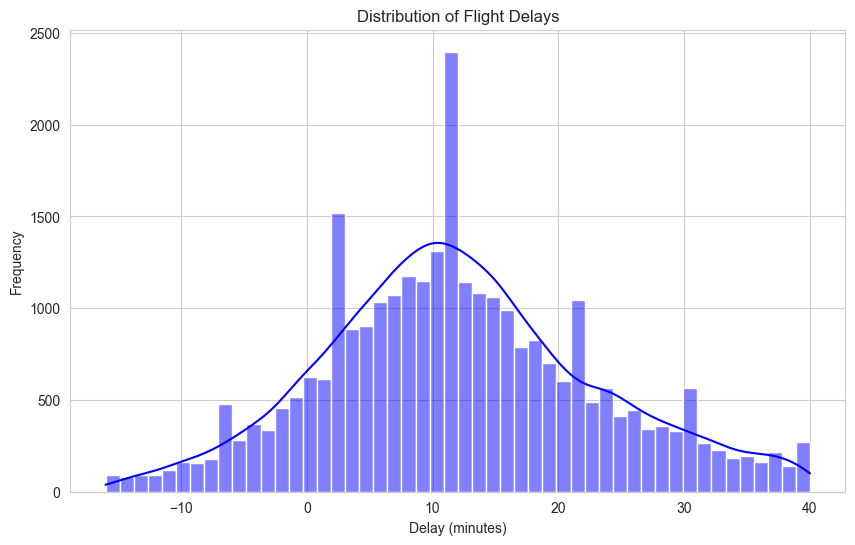

C:\Users\Shahz\AppData\Local\Temp\ipykernel_20728\4076374445.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Hour", y="Delay", data=hourly_delay, palette="viridis")


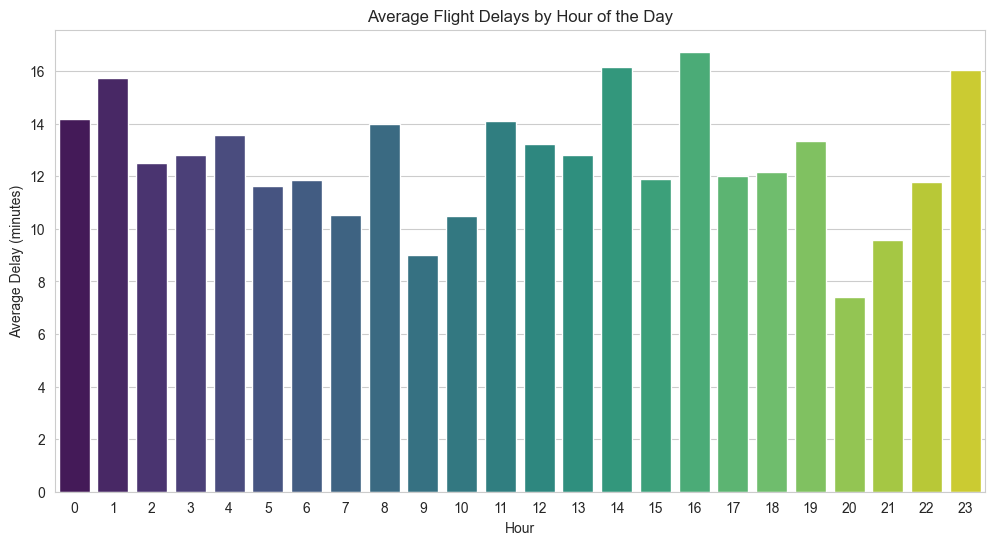

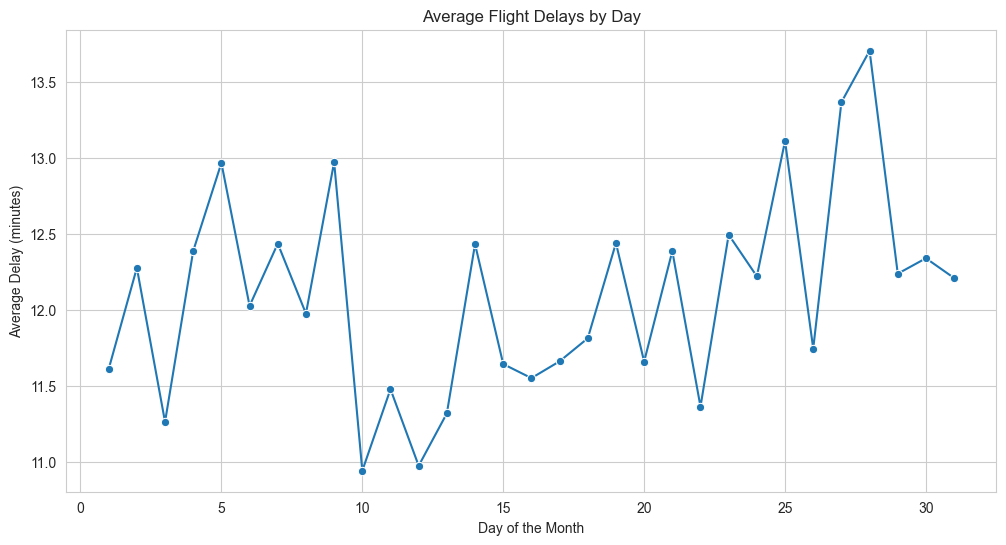

C:\Users\Shahz\AppData\Local\Temp\ipykernel_20728\4076374445.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Departure Airport", y="Delay", data=airport_delay, palette="coolwarm")


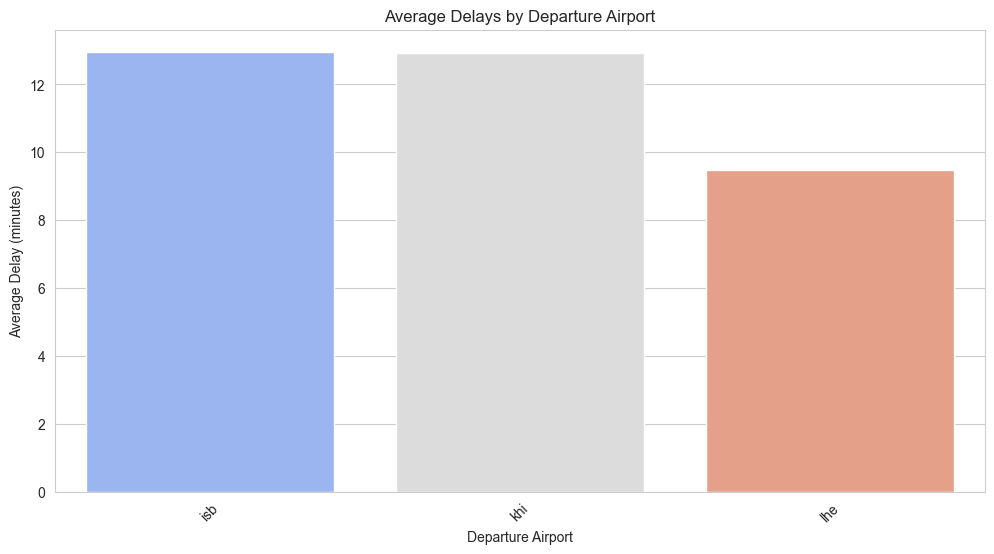

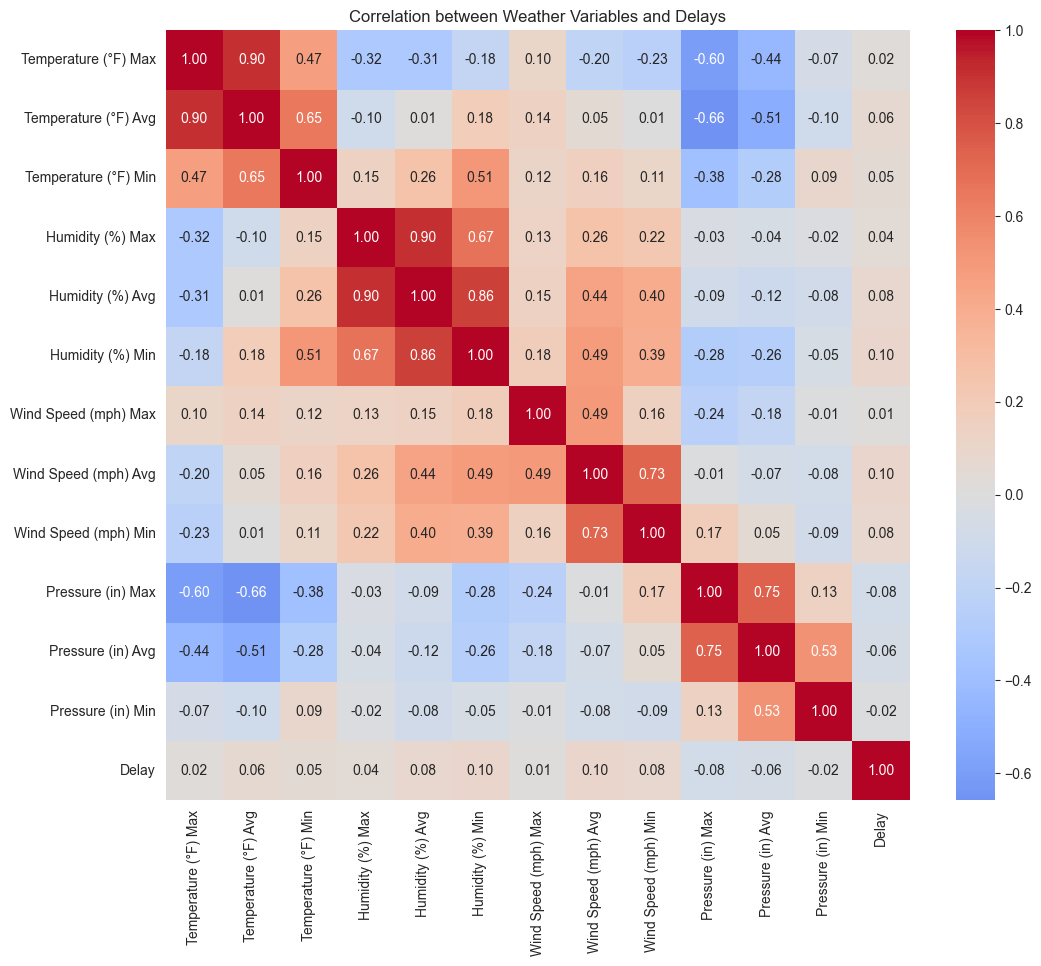

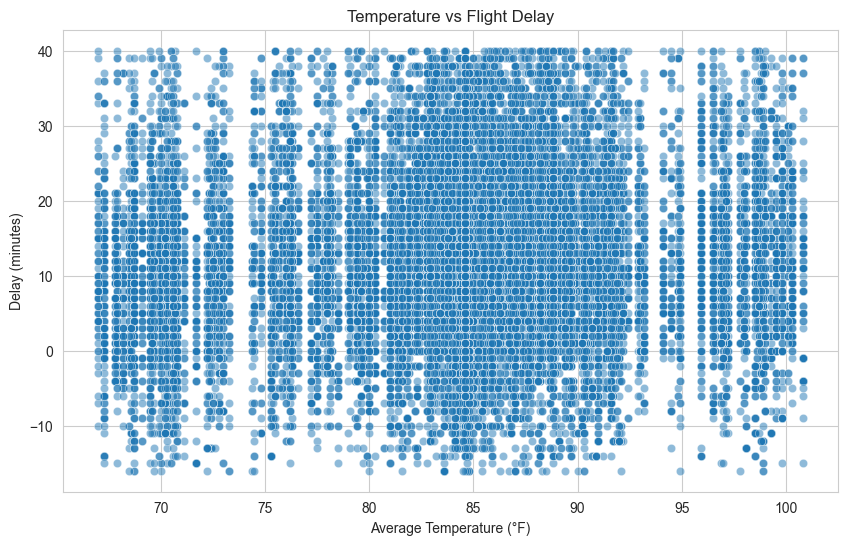

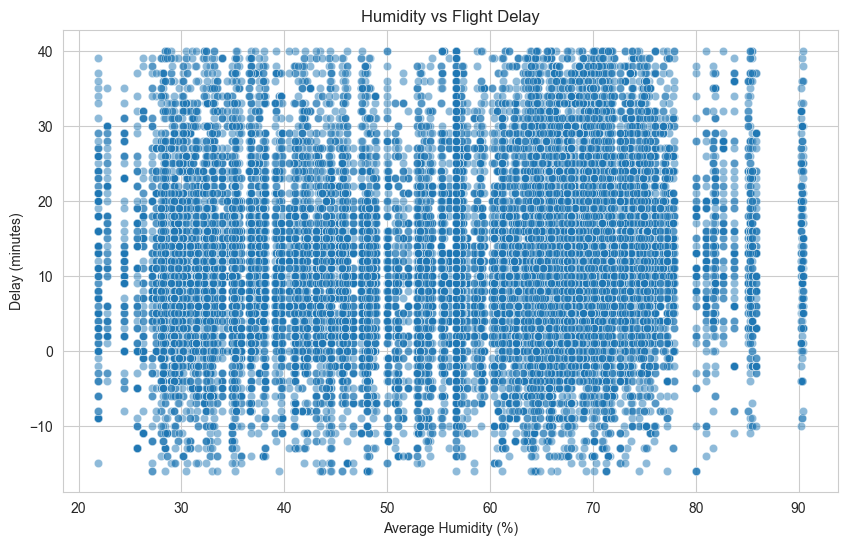

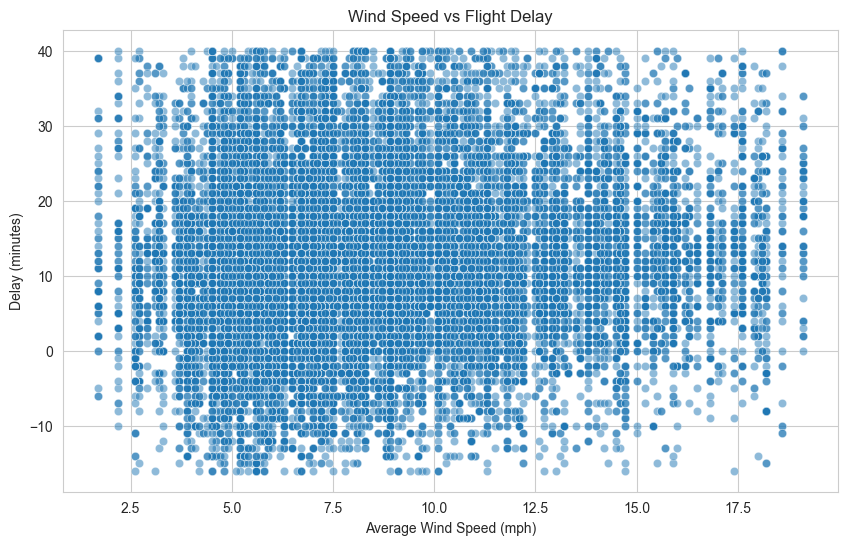

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def calculate_delay(df):
    """Calculate delay using Scheduled Time and Actual Time."""

    df["Scheduled Time"] = pd.to_datetime(df["Scheduled Time"])
    df["Actual Time"] = pd.to_datetime(df["Actual Time"])
    
    df["Delay"] = (df["Actual Time"] - df["Scheduled Time"]).dt.total_seconds() / 60.0
    return df



def remove_outliers(df):
    """
    Remove outliers from the dataset using the IQR method for the 'Delay' column.
    """
    #calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df["Delay"].quantile(0.25)
    Q3 = df["Delay"].quantile(0.75)
    IQR = Q3 - Q1

    #define lower and upper bounds for delays
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #filter out outliers
    df_filtered = df[(df["Delay"] >= lower_bound) & (df["Delay"] <= upper_bound)].copy()
    
    print(f"Removed delays outside the range {lower_bound} to {upper_bound}")
    return df_filtered


#visualizations
def plot_delay_distribution(df):
    """Plot histogram showing delay distribution."""
    plt.figure(figsize=(10, 6))
    sns.histplot(df["Delay"].dropna(), bins=50, kde=True, color='blue')
    plt.title("Distribution of Flight Delays")
    plt.xlabel("Delay (minutes)")
    plt.ylabel("Frequency")
    plt.show()


def plot_temporal_analysis(df):
    """Line plot/bar charts for delays over hours, days, and months."""
    #extract relevant temporal components from Scheduled Time
    df["Hour"] = df["Scheduled Time"].dt.hour
    df["Day"] = df["Scheduled Time"].dt.day
    df["Month"] = df["Scheduled Time"].dt.month

    #aggregate by hour
    hourly_delay = df.groupby("Hour")["Delay"].mean().reset_index()


    plt.figure(figsize=(12, 6))
    sns.barplot(x="Hour", y="Delay", data=hourly_delay, palette="viridis")
    plt.title("Average Flight Delays by Hour of the Day")
    plt.xlabel("Hour")
    plt.ylabel("Average Delay (minutes)")
    plt.show()

    #aggregate by day
    daily_delay = df.groupby("Day")["Delay"].mean().reset_index()

    #plot daily delay analysis
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Day", y="Delay", data=daily_delay, marker="o")
    plt.title("Average Flight Delays by Day")
    plt.xlabel("Day of the Month")
    plt.ylabel("Average Delay (minutes)")
    plt.show()


def plot_category_wise_analysis(df):
    """Analyze delays by category such as departure airport."""
    #group by Departure Airport
    airport_delay = df.groupby("Departure Airport")["Delay"].mean().reset_index()

    #barplot for category-wise analysis by Departure Airport
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Departure Airport", y="Delay", data=airport_delay, palette="coolwarm")
    plt.title("Average Delays by Departure Airport")
    plt.xlabel("Departure Airport")
    plt.ylabel("Average Delay (minutes)")
    plt.xticks(rotation=45)
    plt.show()


#Correlation Analysis
def plot_weather_correlation(df):
    """Plot correlation between weather conditions and delays."""
    #select relevant columns for analysis
    weather_columns = [
        "Temperature (°F) Max",
        "Temperature (°F) Avg",
        "Temperature (°F) Min",
        "Humidity (%) Max",
        "Humidity (%) Avg",
        "Humidity (%) Min",
        "Wind Speed (mph) Max",
        "Wind Speed (mph) Avg",
        "Wind Speed (mph) Min",
        "Pressure (in) Max",
        "Pressure (in) Avg",
        "Pressure (in) Min"
    ]
    
    #correlation heatmap between weather and delays
    correlation_df = df[weather_columns + ["Delay"]].dropna()
    correlation_matrix = correlation_df.corr()

    #plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0)
    plt.title("Correlation between Weather Variables and Delays")
    plt.show()


def scatter_weather_vs_delay(df):
    """Scatter plots for a few selected weather variables vs. delay."""
    #temperature vs Delay
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Temperature (°F) Avg", y="Delay", data=df, alpha=0.5)
    plt.title("Temperature vs Flight Delay")
    plt.xlabel("Average Temperature (°F)")
    plt.ylabel("Delay (minutes)")
    plt.show()

    #humidity vs Delay
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Humidity (%) Avg", y="Delay", data=df, alpha=0.5)
    plt.title("Humidity vs Flight Delay")
    plt.xlabel("Average Humidity (%)")
    plt.ylabel("Delay (minutes)")
    plt.show()

    #wind Speed vs Delay
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Wind Speed (mph) Avg", y="Delay", data=df, alpha=0.5)
    plt.title("Wind Speed vs Flight Delay")
    plt.xlabel("Average Wind Speed (mph)")
    plt.ylabel("Delay (minutes)")
    plt.show()


#main driver for EDA
def perform_eda(df):
    """Driver function to run all EDA steps."""
    #calculate delays
    df = calculate_delay(df)

    #remove outliers from the delay data
    df = remove_outliers(df)

    #visualizations
    plot_delay_distribution(df)
    plot_temporal_analysis(df)
    plot_category_wise_analysis(df)

    #correlation analysis
    plot_weather_correlation(df)
    scatter_weather_vs_delay(df)


#call the EDA with cleaned data
perform_eda(processed_merged_data) 

## Model Training

In [5]:
data.columns

Index(['Unnamed: 0', 'Flight Number', 'Departure Airport', 'Scheduled Time',
       'Actual Time', 'Arrival Airport', 'Scheduled Date',
       'Temperature (°F) Max', 'Temperature (°F) Avg', 'Temperature (°F) Min',
       'Date', 'Dew Point (°F) Max', 'Dew Point (°F) Avg',
       'Dew Point (°F) Min', 'Humidity (%) Max', 'Humidity (%) Avg',
       'Humidity (%) Min', 'Wind Speed (mph) Max', 'Wind Speed (mph) Avg',
       'Wind Speed (mph) Min', 'Pressure (in) Max', 'Pressure (in) Avg',
       'Pressure (in) Min', 'Weather Date'],
      dtype='object')

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

#load the dataset
data = pd.read_csv("Cleaned_data_set.csv")


data['Scheduled Time'] = pd.to_datetime(data['Scheduled Time'], errors='coerce')
data['Actual Time'] = pd.to_datetime(data['Actual Time'], errors='coerce')

#calculate delay in minutes (difference between scheduled and actual times)
data['Delay'] = (data['Actual Time'] - data['Scheduled Time']).dt.total_seconds() / 60

#define the target column: On-time (0) or Delayed (1)
data['OnTime'] = np.where(data['Delay'] > 0, 1, 0)  # 0 = On-time, 1 = Delayed

#drop rows with missing values (if needed)
data = data.dropna(subset=['Delay', 'OnTime'])

#select relevant features (add more features as needed)
features = data[['Temperature (\u00b0F) Max', 'Humidity (%) Max', 'Wind Speed (mph) Max', 'Pressure (in) Max']]
target = data['OnTime']

#handle missing values in features
features = features.fillna(features.median())  

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#train Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

#evaluate model
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#precision, Recall and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

#classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#feature Importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)




Accuracy: 0.86
Precision: 0.86
Recall: 1.00
F1-Score: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.04       887
           1       0.86      1.00      0.92      5311

    accuracy                           0.86      6198
   macro avg       0.68      0.51      0.48      6198
weighted avg       0.81      0.86      0.80      6198


Feature Importances:
                Feature  Importance
3     Pressure (in) Max    0.370811
0  Temperature (°F) Max    0.249583
1      Humidity (%) Max    0.192740
2  Wind Speed (mph) Max    0.186866


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

#model 2 random forest classifier
data = pd.read_csv("Cleaned_data_set.csv")


data['Scheduled Time'] = pd.to_datetime(data['Scheduled Time'], errors='coerce')
data['Actual Time'] = pd.to_datetime(data['Actual Time'], errors='coerce')

#calcluation of delay in minutes (difference between scheduled and actual times)
data['Delay'] = (data['Actual Time'] - data['Scheduled Time']).dt.total_seconds() / 60


conditions = [
    (data['Delay'] == 0),
    (data['Delay'] > 0) & (data['Delay'] < 45),
    (data['Delay'] >= 45) & (data['Delay'] <= 175),
    (data['Delay'] > 175)
]
choices = [0, 1, 2, 3]  
data['DelayCategory'] = np.select(conditions, choices, default=np.nan)

#drop rows with missing target values
data = data.dropna(subset=['DelayCategory'])

#select relevant features
features = data[['Temperature (\u00b0F) Max', 'Humidity (%) Max', 'Wind Speed (mph) Max', 'Pressure (in) Max']]
target = data['DelayCategory']

#handle missing values in features
features = features.fillna(features.median())  # Replace NaN with median values

#splitting Data set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#train Multi-Class Classification Model

#initialize Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#predictions 
y_pred = model.predict(X_test)

#model evaluation
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#precision, recall, f1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))





Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       133
         1.0       0.96      1.00      0.98      5171
         2.0       0.00      0.00      0.00        99

    accuracy                           0.96      5403
   macro avg       0.32      0.33      0.33      5403
weighted avg       0.92      0.96      0.94      5403



c:\Users\Shahz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shahz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shahz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#load the dataset
data = pd.read_csv("Cleaned_data_set.csv")

#ensure 'Scheduled Time' and 'Actual Time' are in datetime format
data['Scheduled Time'] = pd.to_datetime(data['Scheduled Time'], errors='coerce')
data['Actual Time'] = pd.to_datetime(data['Actual Time'], errors='coerce')

#calculate delay in minutes (difference between scheduled and actual times)
data['Delay'] = (data['Actual Time'] - data['Scheduled Time']).dt.total_seconds() / 60

#drop rows with missing values (if needed)
data = data.dropna(subset=['Delay'])

#remove outliers in 'Delay' column using the IQR method
Q1 = data['Delay'].quantile(0.25)
Q3 = data['Delay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Delay'] >= lower_bound) & (data['Delay'] <= upper_bound)]

#select relevant features and target variable
features = data[['Temperature (\u00b0F) Max', 'Humidity (%) Max', 'Wind Speed (mph) Max', 'Pressure (in) Max']]
target = data['Delay']

#handle missing values in features
features = features.fillna(features.median())  # Replace NaN with median values

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

#evaluate model
#mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse }")

#mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae }")

#r-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")



Mean Squared Error: 74.84932139611806
Mean Absolute Error: 8.411068554018883
R-squared Score: 0.01


## Part 4 Model optimization and evaluation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

#load the dataset
data = pd.read_csv("Cleaned_data_set.csv")


#ensure 'Scheduled Time' and 'Actual Time' are in datetime format
data['Scheduled Time'] = pd.to_datetime(data['Scheduled Time'], errors='coerce')
data['Actual Time'] = pd.to_datetime(data['Actual Time'], errors='coerce')

#find delays
data['Delay'] = (data['Actual Time'] - data['Scheduled Time']).dt.total_seconds() / 60

#define classification target: On-time (0) or Delayed (1)
data['OnTime'] = np.where(data['Delay'] > 0, 1, 0)  # 0 = On-time, 1 = Delayed

#handling missing values
data['Delay'] = data['Delay'].fillna(0)

#filter extreme delays (remove anomalies if necessary)
data = data[(data['Delay'] > -60) & (data['Delay'] < 180)]

#select the relevant features
features = data[['Temperature (\u00b0F) Max', 'Humidity (%) Max', 'Wind Speed (mph) Max', 'Pressure (in) Max']]
target = data['OnTime']

#handle missing values in features
features = features.fillna(features.median())

#scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

#define models to compare
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42)
}

#set hyperparameter grids for each model
param_grids = {
    "Decision Tree Classifier": {
        "max_depth": [3, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest Classifier": {
        "n_estimators": [50, 100, 150, 200],
        "max_depth": [3, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}

#function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    #make predictions
    y_pred = model.predict(X_test)

    #calcuation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    return {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": matrix
    }

#perform hyperparameter tuning and model evaluation
results = {}

for model_name in models:
    print(f"Training and optimizing model: {model_name}")

    grid_search = GridSearchCV(
        estimator=models[model_name],
        param_grid=param_grids[model_name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    #fit the model
    grid_search.fit(X_train, y_train)

    #extract the best parameters and evaluate performance
    best_model = grid_search.best_estimator_
    metrics = evaluate_model(best_model, X_test, y_test)

    #log the results
    results[model_name] = {
        "Best Parameters": grid_search.best_params_,
        **metrics
    }

#diplay comparison of models' performance
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])

Training and optimizing model: Decision Tree Classifier
Training and optimizing model: Random Forest Classifier

Model: Decision Tree Classifier
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.44      0.48      4948
           1       0.55      0.63      0.59      5317

    accuracy                           0.54     10265
   macro avg       0.54      0.54      0.53     10265
weighted avg       0.54      0.54      0.54     10265

Confusion Matrix:
[[2193 2755]
 [1965 3352]]

Model: Random Forest Classifier
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.43      0.48      4948
           1       0.55      0.65      0.60      5317

    accuracy            

## removing outliers to make it better

Training and optimizing model: Linear Regression
Training and optimizing model: Decision Tree Classifier
Training and optimizing model: Random Forest Classifier

Comparison of Model Performance:
                                                            Best Parameters  \
Linear Regression                                                        {}   
Decision Tree Classifier  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...   
Random Forest Classifier  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...   

                         RMSE Cross-Validation       MAE RMSE on Test Set  
Linear Regression                     9.708903  8.069118         9.713526  
Decision Tree Classifier              9.672337  7.990868          9.67637  
Random Forest Classifier              9.662124  7.993137         9.666785  


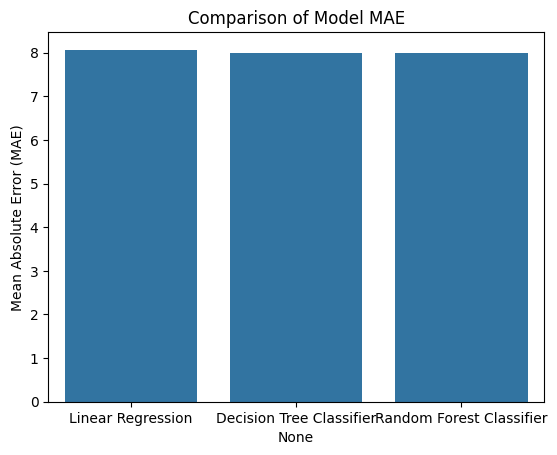

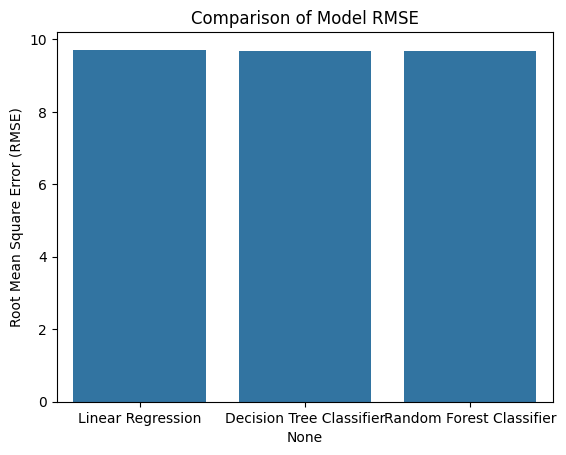

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# removing outliers
def remove_outliers(df, column_name):
    """
    Removes outliers based on the IQR method for the given column.
    Args:
    - df: DataFrame to process
    - column_name: The column from which outliers will be removed
    
    Returns:
    - A filtered DataFrame without outliers
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)].copy()
    return df_filtered


#loading the dataset
data = pd.read_csv("Cleaned_data_set.csv")


#data preprocessing
# setting up schedule and actual time format
data['Scheduled Time'] = pd.to_datetime(data['Scheduled Time'], errors='coerce')
data['Actual Time'] = pd.to_datetime(data['Actual Time'], errors='coerce')

# calculation of delay time
data['Delay'] = (data['Actual Time'] - data['Scheduled Time']).dt.total_seconds() / 60

#handling out missing null values if still present
data['Delay'] = data['Delay'].fillna(0)

#removing outilers from delay
data = remove_outliers(data, 'Delay')

#removing outliers from other features
features_to_clean = [
    'Temperature (\u00b0F) Max',
    'Humidity (%) Max',
    'Wind Speed (mph) Max',
    'Pressure (in) Max'
]

for feature in features_to_clean:
    data = remove_outliers(data, feature)

#selection of features
features = data[['Temperature (\u00b0F) Max', 'Humidity (%) Max', 'Wind Speed (mph) Max', 'Pressure (in) Max']]
target = data['Delay']

#handling missing values in features
features = features.fillna(features.median())

#scaling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#splitting into test train data set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


#comparing models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Classifier": DecisionTreeRegressor(random_state=42),
    "Random Forest Classifier": RandomForestRegressor(random_state=42)
}

#setting up hyperparamters for each
param_grids = {
    "Linear Regression": {},  #no hyperparameters for linear regression
    "Decision Tree Classifier": {
        "max_depth": [3, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest Classifier": {
        "n_estimators": [50, 100, 150, 200],
        "max_depth": [3, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}


#function to evaluate modle performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    #performing cross validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    rmse_cv = np.sqrt(-scores.mean())
    
    #training model and making predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #calculation of metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return {
        "RMSE Cross-Validation": rmse_cv,
        "MAE": mae,
        "RMSE on Test Set": rmse
    }


#performing hyper parameters evaluations
results = {}

for model_name in models:
    print(f"Training and optimizing model: {model_name}")
    
    grid_search = GridSearchCV(
        estimator=models[model_name],
        param_grid=param_grids[model_name],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    #fitting the model
    grid_search.fit(X_train, y_train)
    
    #extraction of best parameters for the model
    best_model = grid_search.best_estimator_
    metrics = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    #log the results
    results[model_name] = {
        "Best Parameters": grid_search.best_params_,
        **metrics
    }

#display the comparison of models
results_df = pd.DataFrame(results).T
print("\nComparison of Model Performance:")
print(results_df)

#visualiztion of comparisons
sns.barplot(x=results_df.index, y=results_df['MAE'])
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of Model MAE")
plt.show()

sns.barplot(x=results_df.index, y=results_df['RMSE on Test Set'])
plt.ylabel("Root Mean Square Error (RMSE)")
plt.title("Comparison of Model RMSE")
plt.show()


## Kaggle Task

In [ ]:
import pandas as pd
data = pd.read_csv('./Binary_Test_File.csv')
data


,File Name,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time
0,20.docx,4361,departure,active,lhe,opla,2024-05-14t00:20:00.000,dxb,omdb,2024-05-14t00:20:00.000
1,20.docx,1876,departure,active,lhe,opla,2024-05-07t04:15:00.000,ruh,oerk,2024-05-07t04:15:00.000
2,20.docx,6030,departure,active,lhe,opla,2024-05-09t03:10:00.000,doh,othh,2024-05-09t03:10:00.000
3,20.docx,739,departure,active,lhe,opla,2024-05-12t02:50:00.000,jed,oejn,2024-05-12t02:50:00.000
4,20.docx,3932,departure,active,lhe,opla,2024-05-16t04:35:00.000,auh,omaa,2024-05-16t04:35:00.000
...,...,...,...,...,...,...,...,...,...,...
12909,71.docx,615,departure,active,isb,opis,2024-06-23t09:30:00.000,doh,othh,2024-06-23t09:30:00.000
12910,71.docx,725,departure,active,isb,opis,2024-06-25t09:50:00.000,ruh,oerk,2024-06-25t10:45:00.000
12911,71.docx,211,departure,active,isb,opis,2024-06-22t15:35:00.000,dxb,omdb,2024-06-22t15:58:00.000
12912,71.docx,207,departure,active,isb,opis,2024-06-19t17:00:00.000,khi,opkc,2024-06-19t18:00:00.000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



train_data = pd.read_csv("test_data_set.csv")


train_data['Scheduled Time'] = pd.to_datetime(train_data['Scheduled Time'], errors='coerce')
train_data['Actual Time'] = pd.to_datetime(train_data['Actual Time'], errors='coerce')
train_data['Delay'] = (train_data['Actual Time'] - train_data['Scheduled Time']).dt.total_seconds() / 60
train_data['Delay'] = train_data['Delay'].fillna(0)  
train_data['Delay_Binary'] = train_data['Delay'].apply(lambda x: 1 if x > 0 else 0)  

features = train_data[['Temperature (°F) Max', 'Humidity (%) Max', 'Wind Speed (mph) Max', 'Pressure (in) Max']].fillna(0)
target = train_data['Delay_Binary']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Model test accuracy: {test_accuracy }")

test_predictions = best_model.predict(features)

mapped_predictions = ['on-time' if x == 0 else 'delayed' for x in test_predictions]

submission_df = pd.DataFrame({
    "ID": range(1, len(mapped_predictions) + 1),
    "Delay": mapped_predictions
})
submission_df.to_csv('updated_solution_binary_2.csv', index=False)
print("updated_solution_binary_2.csv successfully created with ID and mapped Delay values.")


Model test accuracy: 0.7404568331397601
updated_solution_binary_2.csv successfully created with ID and mapped Delay values.


In [49]:
df = pd.read_csv('./updated_solution_binary_2.csv')
df

,ID,Delay
0,1,on-time
1,2,on-time
2,3,on-time
3,4,delayed
4,5,on-time
...,...,...
12909,12910,on-time
12910,12911,on-time
12911,12912,delayed
12912,12913,delayed


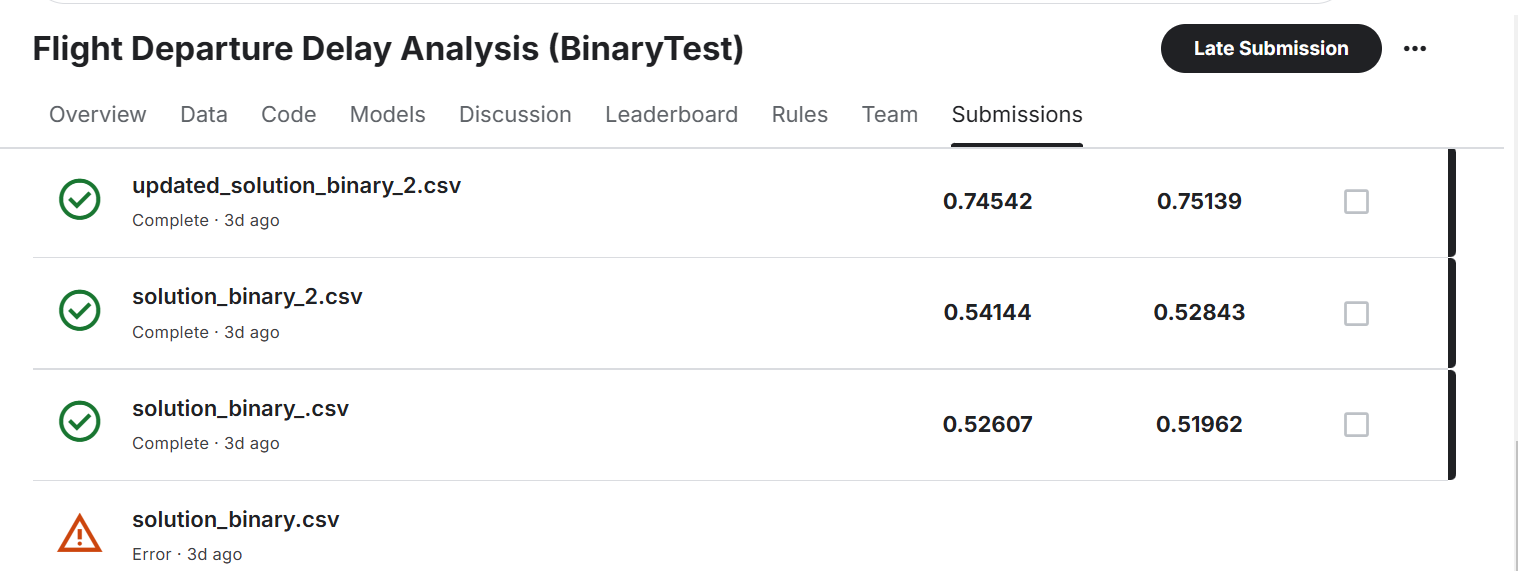

### For multitest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



data = pd.read_csv("Binary_test_File.csv")

data['Scheduled Time'] = pd.to_datetime(data['Scheduled Time'], errors='coerce')
data['Arrival Estimated Time'] = pd.to_datetime(data['Arrival Estimated Time'], errors='coerce')

data['Delay'] = (data['Arrival Estimated Time'] - data['Scheduled Time']).dt.total_seconds() / 60
data['Delay'] = data['Delay'].fillna(0) 

def categorize_delay(delay):
    if delay == 0:
        return 'No Delay'
    elif 0 < delay <= 30:
        return 'Short Delay'
    elif 30 < delay <= 60:
        return 'Moderate Delay'
    else:
        return 'Long Delay'


data['Delay_Category'] = data['Delay'].apply(categorize_delay)


encoder = LabelEncoder()
data['Departure_Code_Encoded'] = encoder.fit_transform(data['Departure IATA Code'])
data['Arrival_Code_Encoded'] = encoder.fit_transform(data['Arrival IATA Code'])


features = data[['Departure_Code_Encoded', 'Arrival_Code_Encoded']]
target = data['Delay_Category']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Model test accuracy: {test_accuracy}")

test_predictions = best_model.predict(features)

submission_df = pd.DataFrame({
    "ID": range(1, len(test_predictions) + 1),
    "Delay": test_predictions
})
submission_df.to_csv('solution_multi_2.csv', index=False)
print("solution_multi.csv successfully created with ID and mapped Delay categories.")


Model test accuracy: 0.7404
solution_multi.csv successfully created with ID and mapped Delay categories.




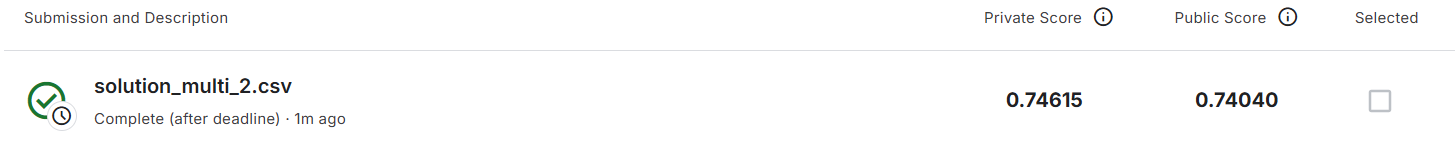

## Regression

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("Binary_Test_File.csv")


data['Scheduled Time'] = pd.to_datetime(data['Scheduled Time'], errors='coerce')
data['Arrival Estimated Time'] = pd.to_datetime(data['Arrival Estimated Time'], errors='coerce')

#calculation of delay
data['Delay'] = (data['Arrival Estimated Time'] - data['Scheduled Time']).dt.total_seconds() / 60
data['Delay'] = data['Delay'].fillna(0)  # Replace NaN delays with 0


encoder = LabelEncoder()
data['Departure_Code_Encoded'] = encoder.fit_transform(data['Departure IATA Code'])
data['Arrival_Code_Encoded'] = encoder.fit_transform(data['Arrival IATA Code'])

#select features and target for regression
features = data[['Departure_Code_Encoded', 'Arrival_Code_Encoded']]
target = data['Delay']

#split the data into train-test sets for internal validation
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict on the test set
y_pred_test = model.predict(X_test)

#evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Model RMSE: {rmse}")
print(f"Model MAE: {mae}")

#predict on the full dataset (for submission purposes)
full_predictions = model.predict(features)

#classify predictions into 0 (on-time) or 1 (delayed)
data['Delay_Status'] = np.where(full_predictions > 0, 1, 0)

#create submission DataFrame
submission_df = pd.DataFrame({
    "ID": range(1, len(data) + 1),
    "Delay": data['Delay_Status']
})

# Save the predictions to CSV file
submission_df.to_csv("solution_regression_binary_labeled.csv", index=False)
print("solution_regression_binary.csv created with ID and Delay columns.")


Model RMSE: 66.35693851822477
Model MAE: 27.492600275252485
solution_regression_binary.csv created with ID and Delay columns.


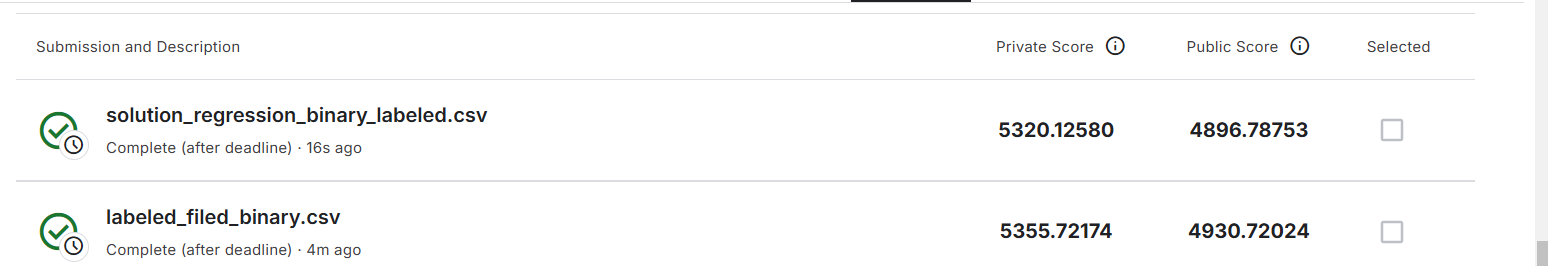